In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
os.stat('./../P1_movies_metadata.csv')

os.stat_result(st_mode=33206, st_ino=49539595901086457, st_dev=3357596530, st_nlink=1, st_uid=0, st_gid=0, st_size=34445126, st_atime=1612786440, st_mtime=1571231952, st_ctime=1602932258)

In [51]:
df=pd.read_csv('./../P1_movies_metadata.csv',encoding='latin-1')

C:\Users\Sonal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [53]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [54]:
df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

## Data Cleaning

In [55]:
#Filling missing values

In [56]:
df['revenue'].fillna(df['revenue'].mean(),inplace=True)

In [57]:
df['runtime']=df['runtime'].fillna(df['runtime'].mean())

In [58]:
df['vote_average']=df['vote_average'].fillna(df['vote_average'].mean())

In [59]:
df['vote_count']=df['vote_count'].fillna(df['vote_count'].mean())

In [60]:
df['original_language'].fillna('Unknown',inplace=True)

In [61]:
df['spoken_languages'].fillna('Unknown',inplace=True)

In [62]:
df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language            0
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      0
runtime                      0
spoken_languages             0
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 0
vote_count                   0
dtype: int64

In [63]:
for i in df.columns:
    print(i,'  ',type(df[i][0]))

adult    <class 'str'>
belongs_to_collection    <class 'str'>
budget    <class 'str'>
genres    <class 'str'>
homepage    <class 'str'>
id    <class 'str'>
imdb_id    <class 'str'>
original_language    <class 'str'>
original_title    <class 'str'>
overview    <class 'str'>
popularity    <class 'float'>
poster_path    <class 'str'>
production_companies    <class 'str'>
production_countries    <class 'str'>
release_date    <class 'str'>
revenue    <class 'numpy.float64'>
runtime    <class 'numpy.float64'>
spoken_languages    <class 'str'>
status    <class 'str'>
tagline    <class 'float'>
title    <class 'str'>
video    <class 'bool'>
vote_average    <class 'numpy.float64'>
vote_count    <class 'numpy.float64'>


In [64]:
#changing the data types

In [65]:
df['budget']=pd.to_numeric(df['budget'],errors='coerce')

In [66]:
df['release_date']=pd.to_datetime(df['release_date'],errors='coerce').dt.date

In [67]:
df['release_date'].isna().sum()

90

In [68]:
df.dropna(subset=['budget','revenue','vote_count','vote_average',],inplace=True)

In [69]:
#Reduction

In [70]:
df.drop(['belongs_to_collection','homepage','tagline','poster_path','overview'],axis=1,inplace=True)

In [71]:
df.isna().sum()

adult                    0
budget                   0
genres                   0
id                       0
imdb_id                 17
original_language        0
original_title           0
popularity               3
production_companies     3
production_countries     3
release_date            87
revenue                  0
runtime                  0
spoken_languages         0
status                  84
title                    3
video                    3
vote_average             0
vote_count               0
dtype: int64

In [72]:
df.dropna(inplace=True)

In [80]:
#Normalization(Min Max)

In [81]:
df['budget_range']=((df['budget']-df['budget'].min())/(df['budget'].max()-df['budget'].min()))*10

In [82]:
df['budget_range']

0        0.789474
1        1.710526
2        0.000000
3        0.421053
4        0.000000
           ...   
45460    0.000000
45462    0.000000
45463    0.000000
45464    0.000000
45465    0.000000
Name: budget_range, Length: 45282, dtype: float64

In [88]:
#Binning

In [89]:
df.shape

(45282, 21)

In [93]:
df.sort_values(by=['revenue'],ascending=True,inplace=True)

In [95]:
df

2787965087.0

In [107]:
for i in range(0,45275,5):
    if(i<185 or i>190 ):
        m=(df.at[i,'revenue']+df.at[i+1,'revenue']+df.at[i+2,'revenue']+df.at[i+3,'revenue']+df.at[i+4,'revenue'])/5
        df.at[i,'revenue']=m
        df.at[i+1,'revenue']=m
        df.at[i+2,'revenue']=m
        df.at[i+3,'revenue']=m
        df.at[i+4,'revenue']=m

KeyError: 711

In [83]:
#Discretization

In [86]:
df['range']=pd.cut(x=df['budget_range'],bins=[-1,2,6,10],labels=['aa','bb','cc'])

(array([4.4699e+04, 5.6000e+02, 2.3000e+01]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

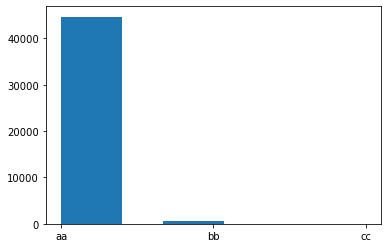

In [109]:
plt.hist(df['range'],width=0.4,bins=3)

In [115]:
#df['range_4']=pd.qcut(x=df['revenue'],q=4)

In [111]:
df['budget_range'].describe()

count    45282.000000
mean         0.111613
std          0.459392
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: budget_range, dtype: float64

In [118]:
df['profit']=df['revenue']-df['budget']

<AxesSubplot:>

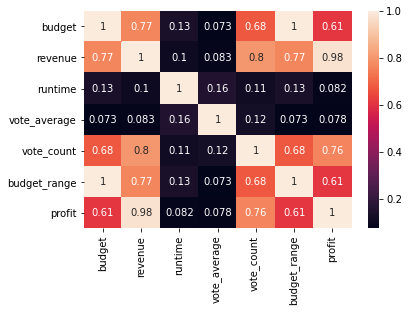

In [119]:
sns.heatmap(df.corr(),annot=True)

In [120]:
df.rename(columns={
    'revenue':'Revenue','budget':'BUDGET'
},inplace=True)

In [121]:
df.columns

Index(['adult', 'BUDGET', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'Revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'video', 'vote_average',
       'vote_count', 'budget_range', 'range', 'profit'],
      dtype='object')

In [124]:
df['runtime'].value_counts()

90.0      2545
0.0       1515
100.0     1464
95.0      1410
93.0      1212
          ... 
277.0        1
299.0        1
330.0        1
1256.0       1
230.0        1
Name: runtime, Length: 354, dtype: int64

In [126]:
len(df['runtime'].unique())

354

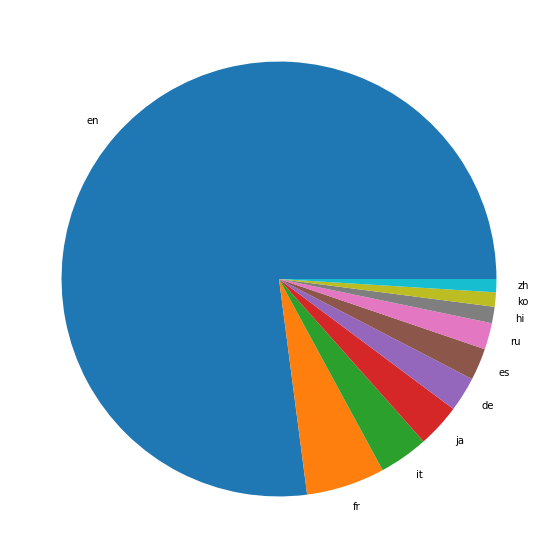

In [151]:
plt.figure(figsize=(10,10))
plt.pie(n_df.iloc[:10],labels=n_df.index[:10])
plt.show()

In [137]:
n_df=df['original_language'].value_counts()

In [148]:
n_df.iloc[0]

32125

In [157]:
n1_df=df.groupby(['original_language'])['BUDGET'].sum()

In [162]:
n1_df.sort_values(ascending=False,inplace=True)

<AxesSubplot:xlabel='original_language'>

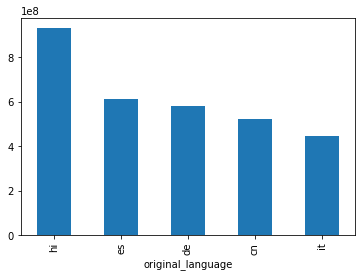

In [164]:
n1_df[5:10].plot(kind='bar')

In [166]:
xls=pd.ExcelFile('Karnataka.xlsx')

In [176]:
xls.sheet_names

['GSVA_cur', 'GSVA_const', 'NSVA_cur', 'NSVA_const']

In [174]:
df1=pd.read_excel(xls,sheet_name='GSVA_cur')

In [175]:
df1.head()

,State :,Karnataka,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,As on 31.07.2020,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,NaN
3,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
4,1.,"Agriculture, forestry and fishing",7.55487e+06,8.18061e+06,9.66614e+06,1.08959e+07,1.12404e+07,1.20553e+07,1.49199e+07,1.54697e+07,1.66573e+07


In [177]:
df2=pd.read_excel(xls,sheet_name='GSVA_const')

In [178]:
df2.head()

,State :,Karnataka,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,As on 31.07.2020,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,NaN
3,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
4,1.,"Agriculture, forestry and fishing",7.55487e+06,7.16953e+06,7.68778e+06,8.01799e+06,7.22776e+06,7.53461e+06,9.00644e+06,8.85898e+06,9.2005e+06


In [180]:
df3=pd.merge(df1,df2,on='Karnataka')

In [181]:
df3

,State :_x,Karnataka,Unnamed: 2_x,Unnamed: 3_x,Unnamed: 4_x,Unnamed: 5_x,Unnamed: 6_x,As on 31.07.2020_x,Unnamed: 8_x,Unnamed: 9_x,...,State :_y,Unnamed: 2_y,Unnamed: 3_y,Unnamed: 4_y,Unnamed: 5_y,Unnamed: 6_y,As on 31.07.2020_y,Unnamed: 8_y,Unnamed: 9_y,Unnamed: 10_y
0,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,...,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df4=pd.concat([df1,df2])

In [184]:
df4

,State :,Karnataka,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,As on 31.07.2020,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Gross State Value Added by economic activity a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,(Rs. in lakh),NaN,NaN,NaN,NaN,NaN
3,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
4,1.,"Agriculture, forestry and fishing",7.55487e+06,8.18061e+06,9.66614e+06,1.08959e+07,1.12404e+07,1.20553e+07,1.49199e+07,1.54697e+07,1.66573e+07
...,...,...,...,...,...,...,...,...,...,...,...
32,13.,Taxes on Products,7.01922e+06,7.45624e+06,8.04531e+06,8.49258e+06,9.51468e+06,1.13916e+07,1.44293e+07,1.57348e+07,1.68548e+07
33,14.,Subsidies on products,1639604,1.66529e+06,1.79946e+06,2.0441e+06,1.91313e+06,1.73414e+06,1.92524e+06,2.02465e+06,2.11639e+06
34,15.,Gross State Domestic Product,6.0601e+07,6.43033e+07,7.04466e+07,7.48429e+07,8.3133e+07,9.42221e+07,1.04353e+08,1.12442e+08,120103127
35,16.,Population ('00),614820,621510,628270,635100,642010,649000,656060,663190,670410
